# 숙명여자대학교 딥러닝 2024 (Assignment 1)

# 과제1: ANN & Optimization - 실습보고서 작성

- 각 실습 과제의 목표 및 목적
- 실습 과제의 진행 과정 구체적인 숫자 포함
- 실습 과제 결과
- 생각해볼 점, 논의할 점, 이외에 본인이 기록하고 싶은 모든 것 가능



# 실습 과제 2 (L1, L2)

### 실습 과제 2. Lab 1 Universal Approximation Theorem에서 L2대신 L1 regularization으로 학습시키고 결과를 비교 논의하세요.

### 목표 : L1 regularization의 개념을 알고 L2 regularization과 비교분석할 수 있다.
 - neuron activation을 시각화 했는 지?
 - fc1과 fc2의 weight와 bias를 시각화 했는 지?
 - weighted activation을 시각화 했는 지?


## 논의사항
- Regularization을 사용하면 사용하지 않은 경우보다 함수 fitting 성능은 떨어진다.
- 두 경우 모두 단순한 모델로 학습된다는 측면에서는 같다고 볼 수 있다. 하지만 그 방법에서는 차이를 보인다.
- neuron activation을 시각화 함으로써 L2는 몇개의 유사한 activation 형태로 보이게 학습되고 L1은 몇개의 activation만 살아남고 나머지는 0에 가까운 값을 가지도록 학습된다.
-  fc1과 fc2의 weight와 bias를 시각화 했을 때 L1은 weight의 값이 전체적으로 몇개만 남고 나머지는 0으로 수렴되고 L2은 (특히 fc1에서) 기존 regularization을 사용하지 않은 경우에 비해서 weight와 bias 값이 작아지는 것을 확인할 수 있다.
- 추가적으로 L2에서 a = w*x+b 가 0이되는 x = -b/w 값을 시각화했을 때 특정값에 수렴하는 것을 확인 할 수 있다. (추가 문제! 이것은 왜그럴까? -> 한번 생각해보세요)


No Reg Epoch [100/2000], Loss: 0.0026
No Reg Epoch [200/2000], Loss: 0.0003
No Reg Epoch [300/2000], Loss: 0.0001
No Reg Epoch [400/2000], Loss: 0.0000
No Reg Epoch [500/2000], Loss: 0.0000
No Reg Epoch [600/2000], Loss: 0.0000
No Reg Epoch [700/2000], Loss: 0.0000
No Reg Epoch [800/2000], Loss: 0.0000
No Reg Epoch [900/2000], Loss: 0.0000
No Reg Epoch [1000/2000], Loss: 0.0000
No Reg Epoch [1100/2000], Loss: 0.0000
No Reg Epoch [1200/2000], Loss: 0.0000
No Reg Epoch [1300/2000], Loss: 0.0000
No Reg Epoch [1400/2000], Loss: 0.0000
No Reg Epoch [1500/2000], Loss: 0.0000
No Reg Epoch [1600/2000], Loss: 0.0000
No Reg Epoch [1700/2000], Loss: 0.0000
No Reg Epoch [1800/2000], Loss: 0.0000
No Reg Epoch [1900/2000], Loss: 0.0000
No Reg Epoch [2000/2000], Loss: 0.0000
L1 Epoch [100/2000], Loss: 0.3640
L1 Epoch [200/2000], Loss: 0.2326
L1 Epoch [300/2000], Loss: 0.1686
L1 Epoch [400/2000], Loss: 0.1415
L1 Epoch [500/2000], Loss: 0.1309
L1 Epoch [600/2000], Loss: 0.1254
L1 Epoch [700/2000], Loss

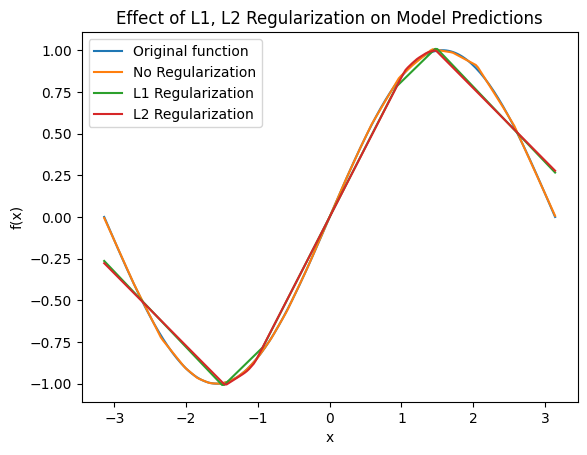

In [14]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y = torch.sin(x)

# Original neural network definition for reference
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Modified neural network definition for activation extraction
class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = torch.relu(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

def train_model_with_regularization(model, criterion, optimizer, x, y, epochs=2000, weight_decay=0.01):
    for epoch in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)

        # L2 Regularization is automatically applied through optimizer's weight_decay parameter
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


# Hyperparameters
hidden_size = 50
criterion = nn.MSELoss()

epochs=2000
reg_lambda = 0.01 # regularization weight
learning_rate = 0.01

# Model without regularization
model_no_reg = NetWithActivations(hidden_size=hidden_size)
optimizer_no_reg = torch.optim.Adam(model_no_reg.parameters(), lr=learning_rate)
for epoch in range(epochs):
    y_pred = model_no_reg(x)
    loss = criterion(y_pred, y)
    optimizer_no_reg.zero_grad()
    loss.backward()
    optimizer_no_reg.step()
    if (epoch+1) % 100 == 0:
        print(f'No Reg Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Model with L1 regularization
model_L1 = NetWithActivations(hidden_size=hidden_size)
optimizer_L1 = torch.optim.Adam(model_L1.parameters(), lr=learning_rate)
for epoch in range(epochs):
    y_pred = model_L1(x)
    loss = criterion(y_pred, y)
    # L1 Regularization
    for param in model_L1.parameters():
      loss += reg_lambda * torch.sum(torch.abs(param))
    optimizer_L1.zero_grad()
    loss.backward()
    optimizer_L1.step()
    if (epoch+1) % 100 == 0:
        print(f'L1 Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Model with L2 regularization
model_L2 = NetWithActivations(hidden_size=hidden_size)
optimizer_L2 = torch.optim.Adam(model_L2.parameters(), lr=learning_rate, weight_decay=reg_lambda)
for epoch in range(epochs):
    y_pred = model_L2(x)
    loss = criterion(y_pred, y)
    optimizer_L2.zero_grad()
    loss.backward()
    optimizer_L2.step()
    if (epoch+1) % 100 == 0:
        print(f'L2 Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Visualization
with torch.no_grad():
    predictions_no_reg = model_no_reg(x).detach().numpy()
    predictions_L1 = model_L1(x).detach().numpy()
    predictions_L2 = model_L2(x).detach().numpy()

plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predictions_no_reg, label='No Regularization')
plt.plot(x.numpy(), predictions_L1, label='L1 Regularization')
plt.plot(x.numpy(), predictions_L2, label='L2 Regularization')
plt.legend()
plt.title('Effect of L1, L2 Regularization on Model Predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## Weighted activation 시각화
- neuron activation 혹은 weighted activation을 시각화 함으로써 L2는 몇개의 유사한 activation 형태로 보이게 학습되고 L1은 몇개의 activation만 살아남고 나머지는 0에 가까운 값을 가지도록 학습된다.

weight with L1: tensor([[-0.0695, -0.1284,  0.0587,  0.1868, -0.0188, -0.3053,  0.2763, -0.2302,
         -0.4781,  0.1789,  0.1495,  0.2376,  0.0780,  0.0607,  0.0058, -0.0369,
         -0.0116,  0.2745,  0.0347, -0.0639,  0.0306, -0.0530,  0.0707,  0.0837,
          0.0617,  0.2224,  0.1086, -0.1492, -0.0453, -0.4724, -0.1934,  0.1807,
         -0.0778,  0.2260,  0.1624,  0.0597,  0.0766, -0.0359,  0.1262,  0.4392,
         -0.4468,  0.0470, -0.1884, -0.1282,  0.0079,  0.0739,  0.1633, -0.0668,
         -0.1301,  0.5929]])
weight with L1: tensor([[-3.7717e-04, -3.1369e-04, -9.6384e-05, -2.3226e-04, -8.9432e-01,
         -7.8431e-04,  1.7842e-04, -1.0475e-04,  1.9132e-04, -3.0092e-05,
         -2.5181e-04,  2.2785e-04,  1.8579e-05, -3.6354e-04, -3.8603e-06,
          3.5850e-04,  1.4499e-03,  5.0519e-04, -6.9933e-04, -1.2252e-03,
          9.0074e-04,  4.6788e-04,  9.0025e-01,  2.2437e-04, -1.5040e-04,
          1.2715e-05,  4.3276e-04, -1.1038e-03,  7.6818e-06, -7.7972e-04,
         

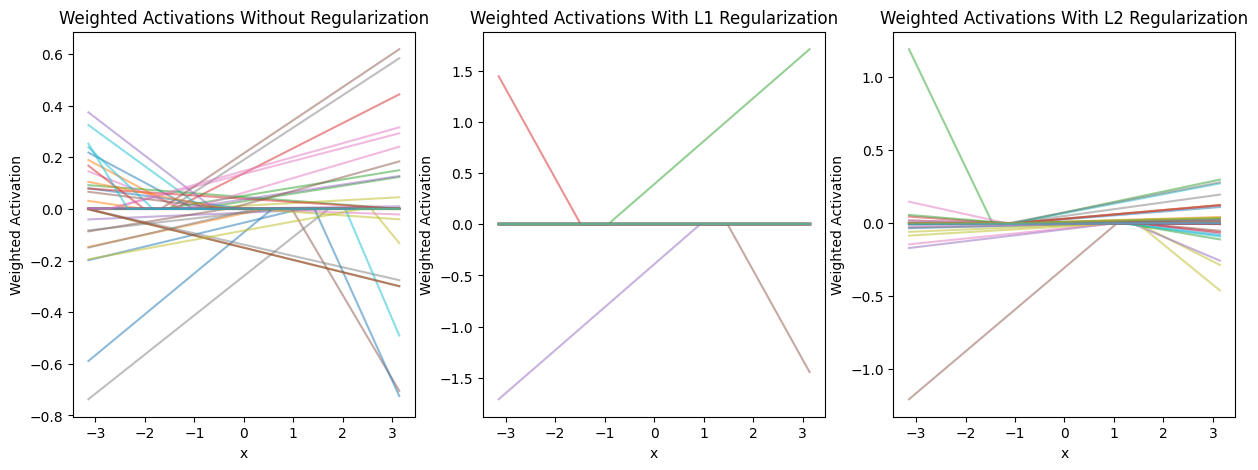

In [15]:
with torch.no_grad():
    _, activations_with_reg = model_no_reg.forward_with_activations(x)
weights_to_output_reg = model_no_reg.fc2.weight.detach()
print('weight with L1:', weights_to_output_reg)
weights_no_reg = weights_to_output_reg
# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')
plt.title('Weighted Activations Without Regularization')
plt.xlabel('x')
plt.ylabel('Weighted Activation')

with torch.no_grad():
    _, activations_with_reg = model_L1.forward_with_activations(x)
weights_to_output_reg = model_L1.fc2.weight.detach()
print('weight with L1:', weights_to_output_reg)
weights_L1 = weights_to_output_reg
# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)
plt.subplot(1,3,2)
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')
plt.title('Weighted Activations With L1 Regularization')
plt.xlabel('x')
plt.ylabel('Weighted Activation')

with torch.no_grad():
    _, activations_with_reg = model_L2.forward_with_activations(x)
weights_to_output_reg = model_L2.fc2.weight.detach()
# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)
print('weight with L2:', weights_to_output_reg)
weights_L2 = weights_to_output_reg
plt.subplot(1,3,3)
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')
plt.title('Weighted Activations With L2 Regularization')
plt.xlabel('x')
plt.ylabel('Weighted Activation')
plt.show()



## Weight와 Bias 시각화
-  fc1과 fc2의 weight와 bias를 시각화 했을 때 L1은 weight의 값이 전체적으로 몇개만 남고 나머지는 0으로 수렴되고 L2은 (특히 fc1에서) 기존 regularization을 사용하지 않은 경우에 비해서 weight와 bias 값이 작아지는 것을 확인할 수 있다.

50 50
50 50
1 1
50 50


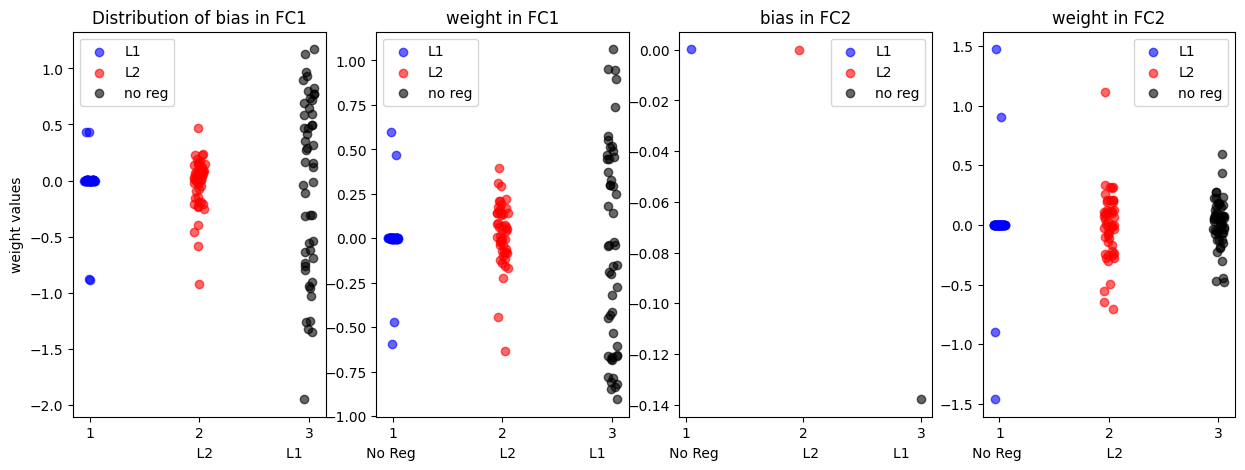

In [34]:
############################# FC1 bias ######################################

weights_no_reg = model_no_reg.fc1.bias.detach()
weights_L1 = model_L1.fc1.bias.detach()
weights_L2 = model_L2.fc1.bias.detach()

jitter_strength = 0.1
weights_L1 = weights_L1.reshape(-1)
weights_L2 = weights_L2.reshape(-1)
weights_no_reg = weights_no_reg.reshape(-1)
N1 = len(weights_L1)
N2 = len(weights_L1)
N3 = len(weights_no_reg)

print(N1, N2)
class_labels = [1, 2, 3]  # Representing two classes

class_1_jitter = np.random.rand(N1) * jitter_strength - (jitter_strength / 2)
class_2_jitter = np.random.rand(N2) * jitter_strength - (jitter_strength / 2)
class_3_jitter = np.random.rand(N3) * jitter_strength - (jitter_strength / 2)


plt.figure(figsize=(15, 5))
plt.subplot(1,4,1)
plt.scatter(class_labels[0] + class_1_jitter, weights_L1, color='blue', alpha=0.6, label='L1')
plt.scatter(class_labels[1] + class_2_jitter, weights_L2, color='red', alpha=0.6, label='L2')
plt.scatter(class_labels[2] + class_3_jitter, weights_no_reg, color='black', alpha=0.6, label='no reg')

# Adding title and labels
plt.title('Distribution of bias in FC1')
plt.ylabel('weight values')

# Adding a legend to the plot
plt.legend()

# Adjusting x-axis to show class labels clearly
plt.xlabel('L1                                             L2                                   No Reg')
plt.xticks([1,2,3])


############################# FC1 Weight ######################################
weights_L1 = model_L1.fc1.weight.detach()
weights_L2 = model_L2.fc1.weight.detach()
weights_no_reg = model_no_reg.fc1.weight.detach()

jitter_strength = 0.1
weights_L1 = weights_L1.reshape(-1)
weights_L2 = weights_L2.reshape(-1)
weights_no_reg = weights_no_reg.reshape(-1)
N1 = len(weights_L1)
N2 = len(weights_L1)
N3 = len(weights_no_reg)

print(N1, N2)
class_labels = [1, 2, 3]  # Representing two classes

class_1_jitter = np.random.rand(N1) * jitter_strength - (jitter_strength / 2)
class_2_jitter = np.random.rand(N2) * jitter_strength - (jitter_strength / 2)
class_3_jitter = np.random.rand(N3) * jitter_strength - (jitter_strength / 2)

plt.subplot(1,4,2)

plt.scatter(class_labels[0] + class_1_jitter, weights_L1, color='blue', alpha=0.6, label='L1')
plt.scatter(class_labels[1] + class_2_jitter, weights_L2, color='red', alpha=0.6, label='L2')
plt.scatter(class_labels[2] + class_3_jitter, weights_no_reg, color='black', alpha=0.6, label='no reg')

# Adding title and labels
plt.title('weight in FC1')

# Adding a legend to the plot
plt.legend()

# Adjusting x-axis to show class labels clearly
plt.xlabel('L1                                             L2                                   No Reg')
plt.xticks([1,2,3])

############################# FC2 Bias ######################################
weights_L1 = model_L1.fc2.bias.detach()
weights_L2 = model_L2.fc2.bias.detach()
weights_no_reg = model_no_reg.fc2.bias.detach()

jitter_strength = 0.1
weights_no_reg = weights_no_reg.reshape(-1)
weights_L1 = weights_L1.reshape(-1)
weights_L2 = weights_L2.reshape(-1)
N1 = len(weights_L1)
N2 = len(weights_L1)
N3 = len(weights_no_reg)

print(N1, N2)
class_labels = [1, 2, 3]  # Representing two classes

class_1_jitter = np.random.rand(N1) * jitter_strength - (jitter_strength / 2)
class_2_jitter = np.random.rand(N2) * jitter_strength - (jitter_strength / 2)
class_3_jitter = np.random.rand(N3) * jitter_strength - (jitter_strength / 2)

plt.subplot(1,4,3)

plt.scatter(class_labels[0] + class_1_jitter, weights_L1, color='blue', alpha=0.6, label='L1')
plt.scatter(class_labels[1] + class_2_jitter, weights_L2, color='red', alpha=0.6, label='L2')
plt.scatter(class_labels[2] + class_3_jitter, weights_no_reg, color='black', alpha=0.6, label='no reg')

# Adding title and labels
plt.title('bias in FC2')

# Adding a legend to the plot
plt.legend()

# Adjusting x-axis to show class labels clearly
plt.xlabel('L1                                             L2                                   No Reg')
plt.xticks([1,2,3])


############################# FC2 Weight ######################################
weights_L1 = model_L1.fc2.weight.detach()
weights_L2 = model_L2.fc2.weight.detach()
weights_no_reg = model_no_reg.fc2.weight.detach()

jitter_strength = 0.1
weights_no_reg = weights_no_reg.reshape(-1)
weights_L1 = weights_L1.reshape(-1)
weights_L2 = weights_L2.reshape(-1)
N1 = len(weights_L1)
N2 = len(weights_L1)
N3 = len(weights_no_reg)

print(N1, N2)
class_labels = [1, 2, 3]  # Representing two classes

class_1_jitter = np.random.rand(N1) * jitter_strength - (jitter_strength / 2)
class_2_jitter = np.random.rand(N2) * jitter_strength - (jitter_strength / 2)
class_3_jitter = np.random.rand(N3) * jitter_strength - (jitter_strength / 2)

plt.subplot(1,4,4)

plt.scatter(class_labels[0] + class_1_jitter, weights_L1, color='blue', alpha=0.6, label='L1')
plt.scatter(class_labels[1] + class_2_jitter, weights_L2, color='red', alpha=0.6, label='L2')
plt.scatter(class_labels[2] + class_3_jitter, weights_no_reg, color='black', alpha=0.6, label='no reg')

# Adding title and labels
plt.title('weight in FC2')

# Adding a legend to the plot
plt.legend()

# Adjusting x-axis to show class labels clearly
plt.xlabel('L1                                             L2                                   No Reg')
plt.xticks([1,2,3])
# Display the plot
plt.show()


## 추가 문제
L2에서 a = w*x+b 가 0이되는 x = -b/w 값을 시각화했을 때 특정값에 수렴하는 것을 확인 할 수 있다. (추가 문제! 이것은 왜그럴까? -> 한번 생각해보세요)

50 50


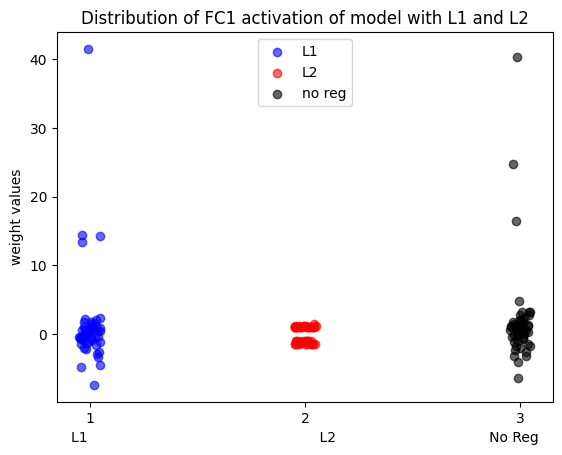

In [35]:
weights_no_reg = model_no_reg.fc1.bias/model_no_reg.fc1.weight.reshape(-1)
weights_L1 = model_L1.fc1.bias/model_L1.fc1.weight.reshape(-1)
weights_L2 = model_L2.fc1.bias/model_L2.fc1.weight.reshape(-1)

jitter_strength = 0.1
weights_L1 = weights_L1.reshape(-1).detach()
weights_L2 = weights_L2.reshape(-1).detach()
weights_no_reg = weights_no_reg.reshape(-1).detach()
N1 = len(weights_L1)
N2 = len(weights_L1)
N3 = len(weights_no_reg)

print(N1, N2)
class_labels = [1, 2, 3]  # Representing two classes

class_1_jitter = np.random.rand(N1) * jitter_strength - (jitter_strength / 2)
class_2_jitter = np.random.rand(N2) * jitter_strength - (jitter_strength / 2)
class_3_jitter = np.random.rand(N3) * jitter_strength - (jitter_strength / 2)

plt.scatter(class_labels[0] + class_1_jitter, weights_L1, color='blue', alpha=0.6, label='L1')
plt.scatter(class_labels[1] + class_2_jitter, weights_L2, color='red', alpha=0.6, label='L2')
plt.scatter(class_labels[2] + class_3_jitter, weights_no_reg, color='black', alpha=0.6, label='no reg')

# Adding title and labels
plt.title('Distribution of FC1 activation of model with L1 and L2')
plt.ylabel('weight values')

# Adding a legend to the plot
plt.legend()

# Adjusting x-axis to show class labels clearly
plt.xlabel('L1                                                     L2                                   No Reg')
plt.xticks([1,2,3])
# Display the plot
plt.show()

## Hidden Neuron 수 감소
- 결과적으로 L1, L2는 아래와 같이 hidden neuron을 감소하켜서 학습시키는 모델과 같은 효과를 낸다는 것을 hidden neuron을 실제로 줄여서 학습시킨 모델을 통해 확인할 수 있다.

No Reg Epoch [100/2000], Loss: 0.1918
No Reg Epoch [200/2000], Loss: 0.1487
No Reg Epoch [300/2000], Loss: 0.0958
No Reg Epoch [400/2000], Loss: 0.0424
No Reg Epoch [500/2000], Loss: 0.0258
No Reg Epoch [600/2000], Loss: 0.0202
No Reg Epoch [700/2000], Loss: 0.0162
No Reg Epoch [800/2000], Loss: 0.0127
No Reg Epoch [900/2000], Loss: 0.0098
No Reg Epoch [1000/2000], Loss: 0.0076
No Reg Epoch [1100/2000], Loss: 0.0061
No Reg Epoch [1200/2000], Loss: 0.0051
No Reg Epoch [1300/2000], Loss: 0.0045
No Reg Epoch [1400/2000], Loss: 0.0041
No Reg Epoch [1500/2000], Loss: 0.0039
No Reg Epoch [1600/2000], Loss: 0.0037
No Reg Epoch [1700/2000], Loss: 0.0037
No Reg Epoch [1800/2000], Loss: 0.0036
No Reg Epoch [1900/2000], Loss: 0.0035
No Reg Epoch [2000/2000], Loss: 0.0035
L1 Epoch [100/2000], Loss: 0.2555
L1 Epoch [200/2000], Loss: 0.1826
L1 Epoch [300/2000], Loss: 0.1531
L1 Epoch [400/2000], Loss: 0.1197
L1 Epoch [500/2000], Loss: 0.1073
L1 Epoch [600/2000], Loss: 0.1049
L1 Epoch [700/2000], Loss

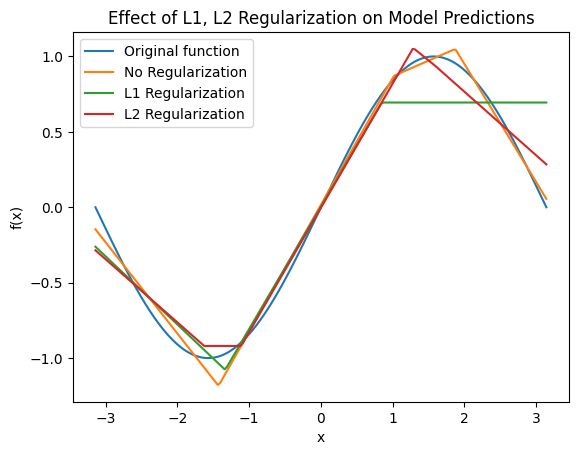

In [11]:
# Hyperparameters
hidden_size = 4
criterion = nn.MSELoss()

epochs=2000
reg_lambda = 0.01 # regularization weight
learning_rate = 0.01

# Model without regularization
model_no_reg = NetWithActivations(hidden_size=hidden_size)
optimizer_no_reg = torch.optim.Adam(model_no_reg.parameters(), lr=learning_rate)
for epoch in range(epochs):
    y_pred = model_no_reg(x)
    loss = criterion(y_pred, y)
    optimizer_no_reg.zero_grad()
    loss.backward()
    optimizer_no_reg.step()
    if (epoch+1) % 100 == 0:
        print(f'No Reg Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Model with L1 regularization
model_L1 = NetWithActivations(hidden_size=hidden_size)
optimizer_L1 = torch.optim.Adam(model_L1.parameters(), lr=learning_rate)
for epoch in range(epochs):
    y_pred = model_L1(x)
    loss = criterion(y_pred, y)
    # L1 Regularization
    for param in model_L1.parameters():
      loss += reg_lambda * torch.sum(torch.abs(param))
    optimizer_L1.zero_grad()
    loss.backward()
    optimizer_L1.step()
    if (epoch+1) % 100 == 0:
        print(f'L1 Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Model with L2 regularization
model_L2 = NetWithActivations(hidden_size=hidden_size)
optimizer_L2 = torch.optim.Adam(model_L2.parameters(), lr=learning_rate, weight_decay=reg_lambda)
for epoch in range(epochs):
    y_pred = model_L2(x)
    loss = criterion(y_pred, y)
    optimizer_L2.zero_grad()
    loss.backward()
    optimizer_L2.step()
    if (epoch+1) % 100 == 0:
        print(f'L2 Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Visualization
with torch.no_grad():
    predictions_no_reg = model_no_reg(x).detach().numpy()
    predictions_L1 = model_L1(x).detach().numpy()
    predictions_L2 = model_L2(x).detach().numpy()

plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predictions_no_reg, label='No Regularization')
plt.plot(x.numpy(), predictions_L1, label='L1 Regularization')
plt.plot(x.numpy(), predictions_L2, label='L2 Regularization')
plt.legend()
plt.title('Effect of L1, L2 Regularization on Model Predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

weight with L1: tensor([[-0.6740, -0.7615,  1.2932, -1.0731]])
weight with L1: tensor([[-2.0718e-04,  1.6534e+00, -2.1837e-05, -1.2249e+00]])
weight with L2: tensor([[ 0.8939, -0.2594,  1.1099, -1.4055]])


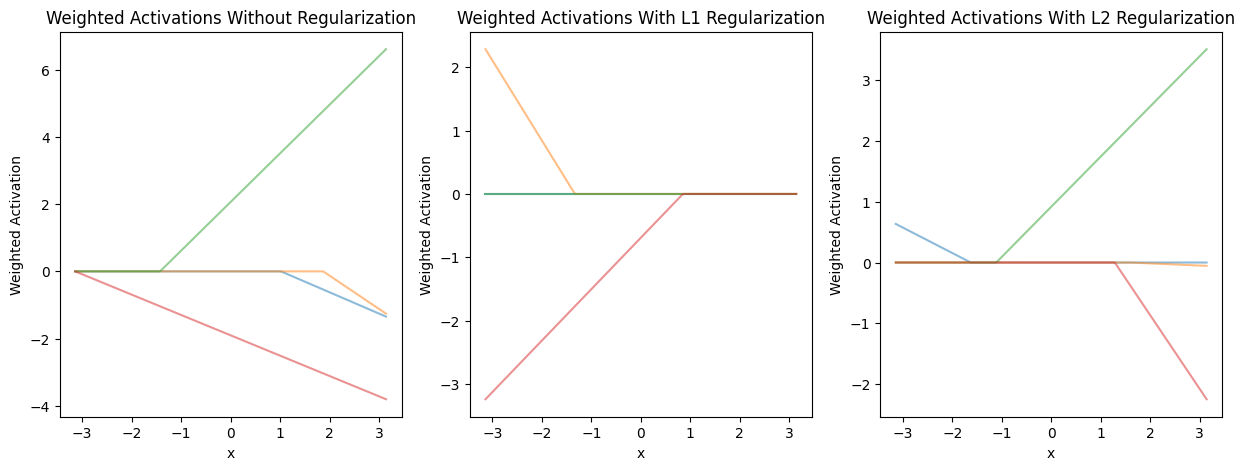

In [12]:
with torch.no_grad():
    _, activations_with_reg = model_no_reg.forward_with_activations(x)
weights_to_output_reg = model_no_reg.fc2.weight.detach()
print('weight with L1:', weights_to_output_reg)
weights_L1 = weights_to_output_reg
# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')
plt.title('Weighted Activations Without Regularization')
plt.xlabel('x')
plt.ylabel('Weighted Activation')

with torch.no_grad():
    _, activations_with_reg = model_L1.forward_with_activations(x)
weights_to_output_reg = model_L1.fc2.weight.detach()
print('weight with L1:', weights_to_output_reg)
weights_L1 = weights_to_output_reg
# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)
plt.subplot(1,3,2)
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')
plt.title('Weighted Activations With L1 Regularization')
plt.xlabel('x')
plt.ylabel('Weighted Activation')

with torch.no_grad():
    _, activations_with_reg = model_L2.forward_with_activations(x)
weights_to_output_reg = model_L2.fc2.weight.detach()
# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)
print('weight with L2:', weights_to_output_reg)
weights_L2 = weights_to_output_reg
plt.subplot(1,3,3)
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')
plt.title('Weighted Activations With L2 Regularization')
plt.xlabel('x')
plt.ylabel('Weighted Activation')
plt.show()



# 실습과제 3 (ReLU외 activation function)

### 실습 과제 3. Lab 1 Universal Approximation Theorem에서 ReLU이외의 다른 activation function으로 학습시켜보고 결과를 논의하세요.

### 목표 : activation function의 종류에 따라 달라지는 딥러닝 모델의 성능을 파악할 수 있다.


## 논의사항
- sigmod 혹은 tanh 등의 activation 함수 사용시 정확도가 올라가는 것을 확인할 수 있다.
- 이것은 approximation theorem에서 근사하고자 하는 함수와 유사항 형태의 basis function(=activation function)을 사용하게 되면 원함수를 추정하는 게 더 쉬어지기 때문이다.
- 더 극명하게 위 차를 보기 위해서 hidden neuron의 수를 4개로 줄였을 때 approximation의 정확도가 훨씬 높은 것을 확인할 수 있다.
- 단, regularization의 효과로 인해 정확도가 낮게 보일 수 있다.


No Reg Epoch [100/2000], Loss: 0.0551
No Reg Epoch [200/2000], Loss: 0.0119
No Reg Epoch [300/2000], Loss: 0.0089
No Reg Epoch [400/2000], Loss: 0.0063
No Reg Epoch [500/2000], Loss: 0.0037
No Reg Epoch [600/2000], Loss: 0.0016
No Reg Epoch [700/2000], Loss: 0.0005
No Reg Epoch [800/2000], Loss: 0.0002
No Reg Epoch [900/2000], Loss: 0.0001
No Reg Epoch [1000/2000], Loss: 0.0001
No Reg Epoch [1100/2000], Loss: 0.0000
No Reg Epoch [1200/2000], Loss: 0.0000
No Reg Epoch [1300/2000], Loss: 0.0000
No Reg Epoch [1400/2000], Loss: 0.0001
No Reg Epoch [1500/2000], Loss: 0.0000
No Reg Epoch [1600/2000], Loss: 0.0001
No Reg Epoch [1700/2000], Loss: 0.0000
No Reg Epoch [1800/2000], Loss: 0.0002
No Reg Epoch [1900/2000], Loss: 0.0000
No Reg Epoch [2000/2000], Loss: 0.0000
L1 Epoch [100/2000], Loss: 0.2273
L1 Epoch [200/2000], Loss: 0.1617
L1 Epoch [300/2000], Loss: 0.1466
L1 Epoch [400/2000], Loss: 0.1385
L1 Epoch [500/2000], Loss: 0.1384
L1 Epoch [600/2000], Loss: 0.1384
L1 Epoch [700/2000], Loss

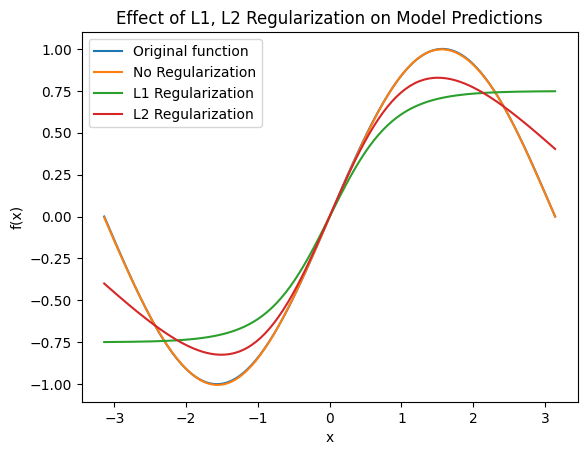

In [37]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y = torch.sin(x)

# Original neural network definition for reference
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Modified neural network definition for activation extraction
class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = torch.sigmoid(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

# Hyperparameters
hidden_size = 50
criterion = nn.MSELoss()

epochs=2000
reg_lambda = 0.01 # regularization weight
learning_rate = 0.01

# Model without regularization
model_no_reg = NetWithActivations(hidden_size=hidden_size)
optimizer_no_reg = torch.optim.Adam(model_no_reg.parameters(), lr=learning_rate)
for epoch in range(epochs):
    y_pred = model_no_reg(x)
    loss = criterion(y_pred, y)
    optimizer_no_reg.zero_grad()
    loss.backward()
    optimizer_no_reg.step()
    if (epoch+1) % 100 == 0:
        print(f'No Reg Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Model with L1 regularization
model_L1 = NetWithActivations(hidden_size=hidden_size)
optimizer_L1 = torch.optim.Adam(model_L1.parameters(), lr=learning_rate)
for epoch in range(epochs):
    y_pred = model_L1(x)
    loss = criterion(y_pred, y)
    # L1 Regularization
    for param in model_L1.parameters():
      loss += reg_lambda * torch.sum(torch.abs(param))
    optimizer_L1.zero_grad()
    loss.backward()
    optimizer_L1.step()
    if (epoch+1) % 100 == 0:
        print(f'L1 Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Model with L2 regularization
model_L2 = NetWithActivations(hidden_size=hidden_size)
optimizer_L2 = torch.optim.Adam(model_L2.parameters(), lr=learning_rate, weight_decay=reg_lambda)
for epoch in range(epochs):
    y_pred = model_L2(x)
    loss = criterion(y_pred, y)
    optimizer_L2.zero_grad()
    loss.backward()
    optimizer_L2.step()
    if (epoch+1) % 100 == 0:
        print(f'L2 Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Visualization
with torch.no_grad():
    predictions_no_reg = model_no_reg(x).detach().numpy()
    predictions_L1 = model_L1(x).detach().numpy()
    predictions_L2 = model_L2(x).detach().numpy()

plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predictions_no_reg, label='No Regularization')
plt.plot(x.numpy(), predictions_L1, label='L1 Regularization')
plt.plot(x.numpy(), predictions_L2, label='L2 Regularization')
plt.legend()
plt.title('Effect of L1, L2 Regularization on Model Predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

weight with L1: tensor([[ 0.0100,  0.4780,  0.3434, -0.2774,  0.3992,  0.3071, -0.2244, -0.4314,
         -0.3363,  0.4436,  0.5207, -0.3879, -0.3599,  0.3667,  0.2698,  0.1067,
         -0.3614, -0.2879, -0.2688,  0.3007,  0.2727,  0.4880,  0.1735,  0.3353,
          0.4460,  0.4849, -0.3864, -0.4216,  0.5140, -0.2935, -0.3735,  0.0723,
          0.2612,  0.2954, -0.4033,  0.5034, -0.6363,  0.3865, -0.6423, -0.3100,
          0.3733, -0.4520, -0.5101, -0.3225, -0.2690,  0.4737,  0.3227, -0.4124,
         -0.0461, -0.2573]])
weight with L1: tensor([[-5.5050e-04,  1.3650e-03, -1.6965e-03, -1.1349e-03, -3.5560e-04,
         -9.8251e-04,  8.2510e-04,  7.4839e-01,  5.0261e-04,  2.0454e-03,
          4.4743e-04, -9.1233e-04, -8.5531e-04, -7.2081e-04,  1.1561e-06,
          3.0361e-04, -7.5021e-01, -1.2571e-03,  2.1403e-03, -1.0321e-03,
         -6.2145e-05, -2.4309e-04,  2.0153e-04,  2.0561e-03, -1.8878e-03,
         -7.7555e-04,  1.3774e-03,  5.6277e-04, -1.1043e-04,  1.6525e-03,
         

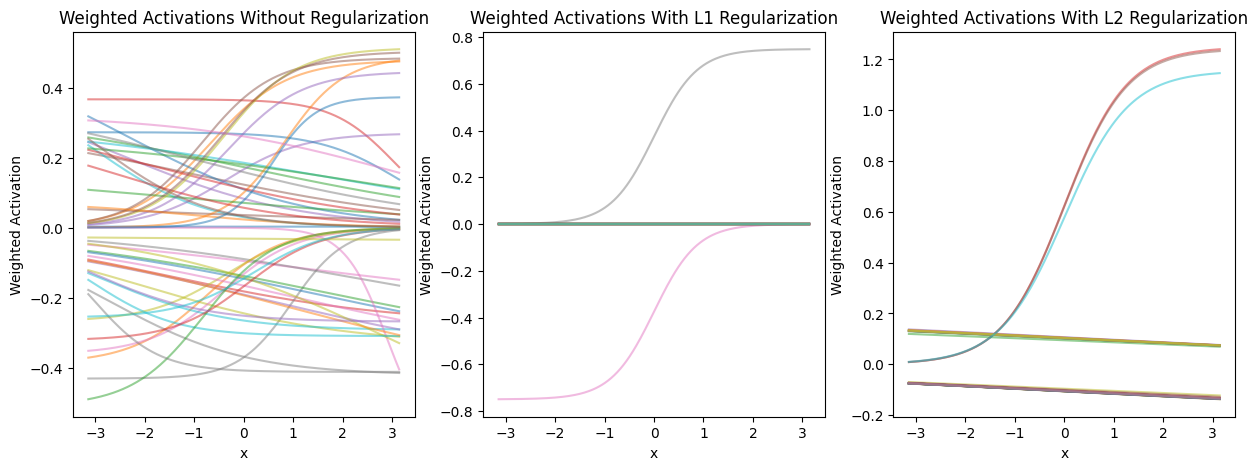

In [38]:
with torch.no_grad():
    _, activations_with_reg = model_no_reg.forward_with_activations(x)
weights_to_output_reg = model_no_reg.fc2.weight.detach()
print('weight with L1:', weights_to_output_reg)
weights_no_reg = weights_to_output_reg
# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')
plt.title('Weighted Activations Without Regularization')
plt.xlabel('x')
plt.ylabel('Weighted Activation')

with torch.no_grad():
    _, activations_with_reg = model_L1.forward_with_activations(x)
weights_to_output_reg = model_L1.fc2.weight.detach()
print('weight with L1:', weights_to_output_reg)
weights_L1 = weights_to_output_reg
# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)
plt.subplot(1,3,2)
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')
plt.title('Weighted Activations With L1 Regularization')
plt.xlabel('x')
plt.ylabel('Weighted Activation')

with torch.no_grad():
    _, activations_with_reg = model_L2.forward_with_activations(x)
weights_to_output_reg = model_L2.fc2.weight.detach()
# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)
print('weight with L2:', weights_to_output_reg)
weights_L2 = weights_to_output_reg
plt.subplot(1,3,3)
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')
plt.title('Weighted Activations With L2 Regularization')
plt.xlabel('x')
plt.ylabel('Weighted Activation')
plt.show()



50 50
50 50
1 1
50 50


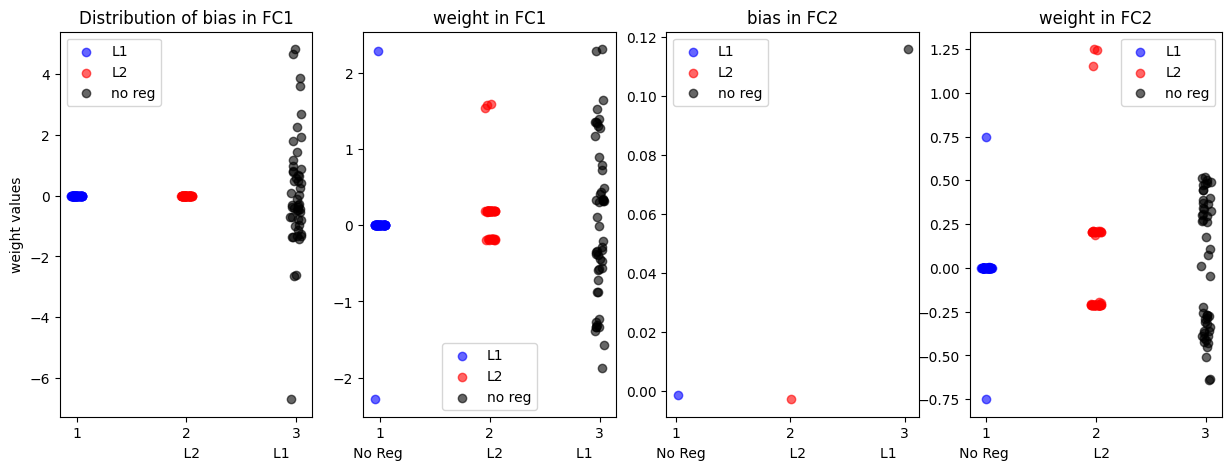

In [39]:
############################# FC1 bias ######################################

weights_no_reg = model_no_reg.fc1.bias.detach()
weights_L1 = model_L1.fc1.bias.detach()
weights_L2 = model_L2.fc1.bias.detach()

jitter_strength = 0.1
weights_L1 = weights_L1.reshape(-1)
weights_L2 = weights_L2.reshape(-1)
weights_no_reg = weights_no_reg.reshape(-1)
N1 = len(weights_L1)
N2 = len(weights_L1)
N3 = len(weights_no_reg)

print(N1, N2)
class_labels = [1, 2, 3]  # Representing two classes

class_1_jitter = np.random.rand(N1) * jitter_strength - (jitter_strength / 2)
class_2_jitter = np.random.rand(N2) * jitter_strength - (jitter_strength / 2)
class_3_jitter = np.random.rand(N3) * jitter_strength - (jitter_strength / 2)


plt.figure(figsize=(15, 5))
plt.subplot(1,4,1)
plt.scatter(class_labels[0] + class_1_jitter, weights_L1, color='blue', alpha=0.6, label='L1')
plt.scatter(class_labels[1] + class_2_jitter, weights_L2, color='red', alpha=0.6, label='L2')
plt.scatter(class_labels[2] + class_3_jitter, weights_no_reg, color='black', alpha=0.6, label='no reg')

# Adding title and labels
plt.title('Distribution of bias in FC1')
plt.ylabel('weight values')

# Adding a legend to the plot
plt.legend()

# Adjusting x-axis to show class labels clearly
plt.xlabel('L1                                             L2                                   No Reg')
plt.xticks([1,2,3])


############################# FC1 Weight ######################################
weights_L1 = model_L1.fc1.weight.detach()
weights_L2 = model_L2.fc1.weight.detach()
weights_no_reg = model_no_reg.fc1.weight.detach()

jitter_strength = 0.1
weights_L1 = weights_L1.reshape(-1)
weights_L2 = weights_L2.reshape(-1)
weights_no_reg = weights_no_reg.reshape(-1)
N1 = len(weights_L1)
N2 = len(weights_L1)
N3 = len(weights_no_reg)

print(N1, N2)
class_labels = [1, 2, 3]  # Representing two classes

class_1_jitter = np.random.rand(N1) * jitter_strength - (jitter_strength / 2)
class_2_jitter = np.random.rand(N2) * jitter_strength - (jitter_strength / 2)
class_3_jitter = np.random.rand(N3) * jitter_strength - (jitter_strength / 2)

plt.subplot(1,4,2)

plt.scatter(class_labels[0] + class_1_jitter, weights_L1, color='blue', alpha=0.6, label='L1')
plt.scatter(class_labels[1] + class_2_jitter, weights_L2, color='red', alpha=0.6, label='L2')
plt.scatter(class_labels[2] + class_3_jitter, weights_no_reg, color='black', alpha=0.6, label='no reg')

# Adding title and labels
plt.title('weight in FC1')

# Adding a legend to the plot
plt.legend()

# Adjusting x-axis to show class labels clearly
plt.xlabel('L1                                             L2                                   No Reg')
plt.xticks([1,2,3])

############################# FC2 Bias ######################################
weights_L1 = model_L1.fc2.bias.detach()
weights_L2 = model_L2.fc2.bias.detach()
weights_no_reg = model_no_reg.fc2.bias.detach()

jitter_strength = 0.1
weights_no_reg = weights_no_reg.reshape(-1)
weights_L1 = weights_L1.reshape(-1)
weights_L2 = weights_L2.reshape(-1)
N1 = len(weights_L1)
N2 = len(weights_L1)
N3 = len(weights_no_reg)

print(N1, N2)
class_labels = [1, 2, 3]  # Representing two classes

class_1_jitter = np.random.rand(N1) * jitter_strength - (jitter_strength / 2)
class_2_jitter = np.random.rand(N2) * jitter_strength - (jitter_strength / 2)
class_3_jitter = np.random.rand(N3) * jitter_strength - (jitter_strength / 2)

plt.subplot(1,4,3)

plt.scatter(class_labels[0] + class_1_jitter, weights_L1, color='blue', alpha=0.6, label='L1')
plt.scatter(class_labels[1] + class_2_jitter, weights_L2, color='red', alpha=0.6, label='L2')
plt.scatter(class_labels[2] + class_3_jitter, weights_no_reg, color='black', alpha=0.6, label='no reg')

# Adding title and labels
plt.title('bias in FC2')

# Adding a legend to the plot
plt.legend()

# Adjusting x-axis to show class labels clearly
plt.xlabel('L1                                             L2                                   No Reg')
plt.xticks([1,2,3])


############################# FC2 Weight ######################################
weights_L1 = model_L1.fc2.weight.detach()
weights_L2 = model_L2.fc2.weight.detach()
weights_no_reg = model_no_reg.fc2.weight.detach()

jitter_strength = 0.1
weights_no_reg = weights_no_reg.reshape(-1)
weights_L1 = weights_L1.reshape(-1)
weights_L2 = weights_L2.reshape(-1)
N1 = len(weights_L1)
N2 = len(weights_L1)
N3 = len(weights_no_reg)

print(N1, N2)
class_labels = [1, 2, 3]  # Representing two classes

class_1_jitter = np.random.rand(N1) * jitter_strength - (jitter_strength / 2)
class_2_jitter = np.random.rand(N2) * jitter_strength - (jitter_strength / 2)
class_3_jitter = np.random.rand(N3) * jitter_strength - (jitter_strength / 2)

plt.subplot(1,4,4)

plt.scatter(class_labels[0] + class_1_jitter, weights_L1, color='blue', alpha=0.6, label='L1')
plt.scatter(class_labels[1] + class_2_jitter, weights_L2, color='red', alpha=0.6, label='L2')
plt.scatter(class_labels[2] + class_3_jitter, weights_no_reg, color='black', alpha=0.6, label='no reg')

# Adding title and labels
plt.title('weight in FC2')

# Adding a legend to the plot
plt.legend()

# Adjusting x-axis to show class labels clearly
plt.xlabel('L1                                             L2                                   No Reg')
plt.xticks([1,2,3])
# Display the plot
plt.show()


50 50


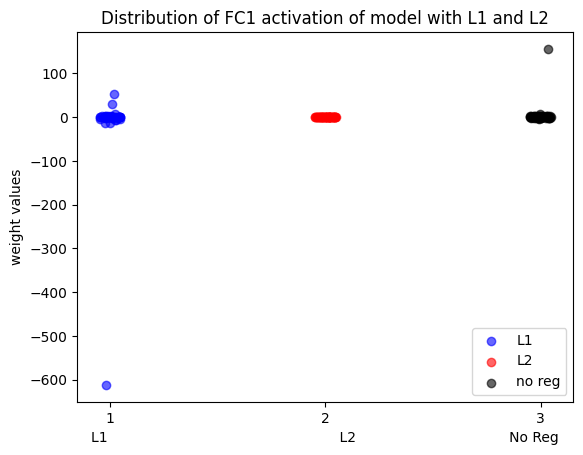

In [40]:
weights_no_reg = model_no_reg.fc1.bias/model_no_reg.fc1.weight.reshape(-1)
weights_L1 = model_L1.fc1.bias/model_L1.fc1.weight.reshape(-1)
weights_L2 = model_L2.fc1.bias/model_L2.fc1.weight.reshape(-1)

jitter_strength = 0.1
weights_L1 = weights_L1.reshape(-1).detach()
weights_L2 = weights_L2.reshape(-1).detach()
weights_no_reg = weights_no_reg.reshape(-1).detach()
N1 = len(weights_L1)
N2 = len(weights_L1)
N3 = len(weights_no_reg)

print(N1, N2)
class_labels = [1, 2, 3]  # Representing two classes

class_1_jitter = np.random.rand(N1) * jitter_strength - (jitter_strength / 2)
class_2_jitter = np.random.rand(N2) * jitter_strength - (jitter_strength / 2)
class_3_jitter = np.random.rand(N3) * jitter_strength - (jitter_strength / 2)

plt.scatter(class_labels[0] + class_1_jitter, weights_L1, color='blue', alpha=0.6, label='L1')
plt.scatter(class_labels[1] + class_2_jitter, weights_L2, color='red', alpha=0.6, label='L2')
plt.scatter(class_labels[2] + class_3_jitter, weights_no_reg, color='black', alpha=0.6, label='no reg')

# Adding title and labels
plt.title('Distribution of FC1 activation of model with L1 and L2')
plt.ylabel('weight values')

# Adding a legend to the plot
plt.legend()

# Adjusting x-axis to show class labels clearly
plt.xlabel('L1                                                     L2                                   No Reg')
plt.xticks([1,2,3])
# Display the plot
plt.show()

No Reg Epoch [100/2000], Loss: 0.1142
No Reg Epoch [200/2000], Loss: 0.0751
No Reg Epoch [300/2000], Loss: 0.0476
No Reg Epoch [400/2000], Loss: 0.0359
No Reg Epoch [500/2000], Loss: 0.0311
No Reg Epoch [600/2000], Loss: 0.0271
No Reg Epoch [700/2000], Loss: 0.0226
No Reg Epoch [800/2000], Loss: 0.0176
No Reg Epoch [900/2000], Loss: 0.0121
No Reg Epoch [1000/2000], Loss: 0.0069
No Reg Epoch [1100/2000], Loss: 0.0038
No Reg Epoch [1200/2000], Loss: 0.0026
No Reg Epoch [1300/2000], Loss: 0.0020
No Reg Epoch [1400/2000], Loss: 0.0015
No Reg Epoch [1500/2000], Loss: 0.0012
No Reg Epoch [1600/2000], Loss: 0.0010
No Reg Epoch [1700/2000], Loss: 0.0008
No Reg Epoch [1800/2000], Loss: 0.0006
No Reg Epoch [1900/2000], Loss: 0.0005
No Reg Epoch [2000/2000], Loss: 0.0004
L1 Epoch [100/2000], Loss: 0.1720
L1 Epoch [200/2000], Loss: 0.1624
L1 Epoch [300/2000], Loss: 0.1592
L1 Epoch [400/2000], Loss: 0.1554
L1 Epoch [500/2000], Loss: 0.1507
L1 Epoch [600/2000], Loss: 0.1424
L1 Epoch [700/2000], Loss

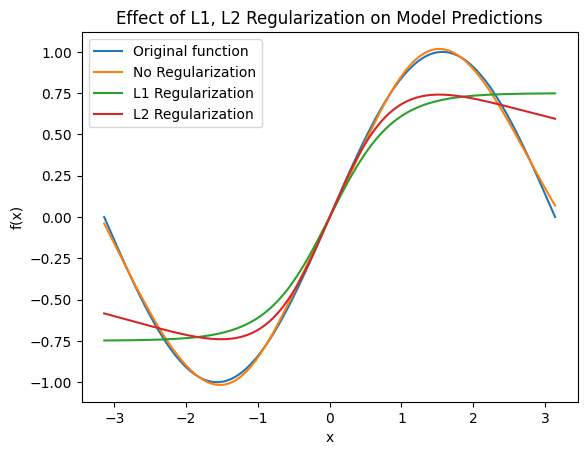

In [41]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y = torch.sin(x)

# Original neural network definition for reference
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Modified neural network definition for activation extraction
class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = torch.sigmoid(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

# Hyperparameters
hidden_size = 4
criterion = nn.MSELoss()

epochs=2000
reg_lambda = 0.01 # regularization weight
learning_rate = 0.01

# Model without regularization
model_no_reg = NetWithActivations(hidden_size=hidden_size)
optimizer_no_reg = torch.optim.Adam(model_no_reg.parameters(), lr=learning_rate)
for epoch in range(epochs):
    y_pred = model_no_reg(x)
    loss = criterion(y_pred, y)
    optimizer_no_reg.zero_grad()
    loss.backward()
    optimizer_no_reg.step()
    if (epoch+1) % 100 == 0:
        print(f'No Reg Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Model with L1 regularization
model_L1 = NetWithActivations(hidden_size=hidden_size)
optimizer_L1 = torch.optim.Adam(model_L1.parameters(), lr=learning_rate)
for epoch in range(epochs):
    y_pred = model_L1(x)
    loss = criterion(y_pred, y)
    # L1 Regularization
    for param in model_L1.parameters():
      loss += reg_lambda * torch.sum(torch.abs(param))
    optimizer_L1.zero_grad()
    loss.backward()
    optimizer_L1.step()
    if (epoch+1) % 100 == 0:
        print(f'L1 Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Model with L2 regularization
model_L2 = NetWithActivations(hidden_size=hidden_size)
optimizer_L2 = torch.optim.Adam(model_L2.parameters(), lr=learning_rate, weight_decay=reg_lambda)
for epoch in range(epochs):
    y_pred = model_L2(x)
    loss = criterion(y_pred, y)
    optimizer_L2.zero_grad()
    loss.backward()
    optimizer_L2.step()
    if (epoch+1) % 100 == 0:
        print(f'L2 Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Visualization
with torch.no_grad():
    predictions_no_reg = model_no_reg(x).detach().numpy()
    predictions_L1 = model_L1(x).detach().numpy()
    predictions_L2 = model_L2(x).detach().numpy()

plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predictions_no_reg, label='No Regularization')
plt.plot(x.numpy(), predictions_L1, label='L1 Regularization')
plt.plot(x.numpy(), predictions_L2, label='L2 Regularization')
plt.legend()
plt.title('Effect of L1, L2 Regularization on Model Predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

weight with L1: tensor([[-1.5454, -2.0438,  3.1026,  2.5206]])
weight with L1: tensor([[ 7.4979e-01, -8.8323e-04,  4.8860e-04, -7.4887e-01]])
weight with L2: tensor([[ 2.1194, -0.0348, -0.8694, -0.8462]])


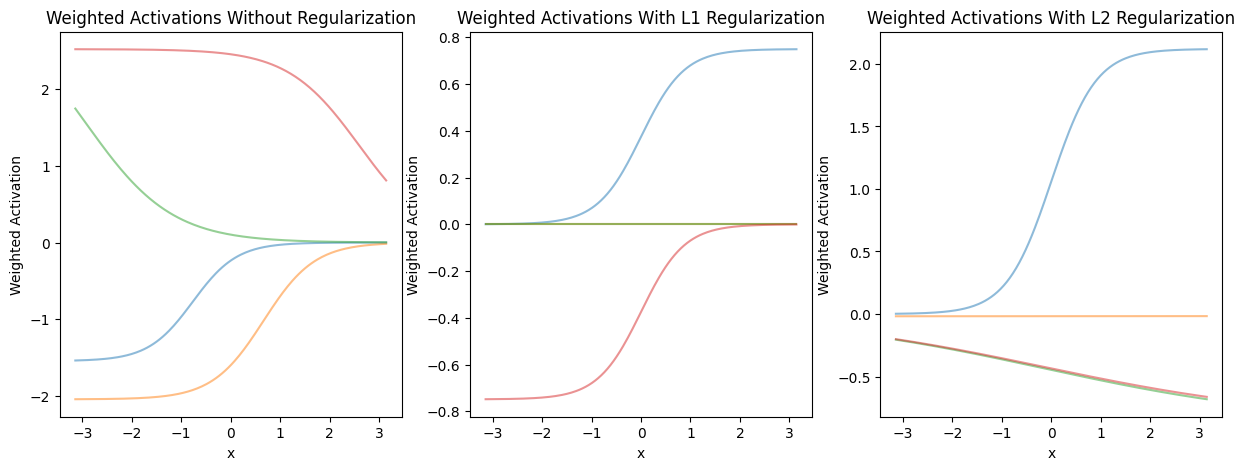

In [42]:
with torch.no_grad():
    _, activations_with_reg = model_no_reg.forward_with_activations(x)
weights_to_output_reg = model_no_reg.fc2.weight.detach()
print('weight with L1:', weights_to_output_reg)
weights_no_reg = weights_to_output_reg
# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')
plt.title('Weighted Activations Without Regularization')
plt.xlabel('x')
plt.ylabel('Weighted Activation')

with torch.no_grad():
    _, activations_with_reg = model_L1.forward_with_activations(x)
weights_to_output_reg = model_L1.fc2.weight.detach()
print('weight with L1:', weights_to_output_reg)
weights_L1 = weights_to_output_reg
# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)
plt.subplot(1,3,2)
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')
plt.title('Weighted Activations With L1 Regularization')
plt.xlabel('x')
plt.ylabel('Weighted Activation')

with torch.no_grad():
    _, activations_with_reg = model_L2.forward_with_activations(x)
weights_to_output_reg = model_L2.fc2.weight.detach()
# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)
print('weight with L2:', weights_to_output_reg)
weights_L2 = weights_to_output_reg
plt.subplot(1,3,3)
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')
plt.title('Weighted Activations With L2 Regularization')
plt.xlabel('x')
plt.ylabel('Weighted Activation')
plt.show()



No Reg Epoch [100/8000], Loss: 0.0405
No Reg Epoch [200/8000], Loss: 0.0103
No Reg Epoch [300/8000], Loss: 0.0069
No Reg Epoch [400/8000], Loss: 0.0038
No Reg Epoch [500/8000], Loss: 0.0011
No Reg Epoch [600/8000], Loss: 0.0002
No Reg Epoch [700/8000], Loss: 0.0000
No Reg Epoch [800/8000], Loss: 0.0000
No Reg Epoch [900/8000], Loss: 0.0000
No Reg Epoch [1000/8000], Loss: 0.0000
No Reg Epoch [1100/8000], Loss: 0.0001
No Reg Epoch [1200/8000], Loss: 0.0000
No Reg Epoch [1300/8000], Loss: 0.0000
No Reg Epoch [1400/8000], Loss: 0.0000
No Reg Epoch [1500/8000], Loss: 0.0000
No Reg Epoch [1600/8000], Loss: 0.0000
No Reg Epoch [1700/8000], Loss: 0.0000
No Reg Epoch [1800/8000], Loss: 0.0000
No Reg Epoch [1900/8000], Loss: 0.0000
No Reg Epoch [2000/8000], Loss: 0.0000
No Reg Epoch [2100/8000], Loss: 0.0000
No Reg Epoch [2200/8000], Loss: 0.0000
No Reg Epoch [2300/8000], Loss: 0.0000
No Reg Epoch [2400/8000], Loss: 0.0000
No Reg Epoch [2500/8000], Loss: 0.0000
No Reg Epoch [2600/8000], Loss: 0.

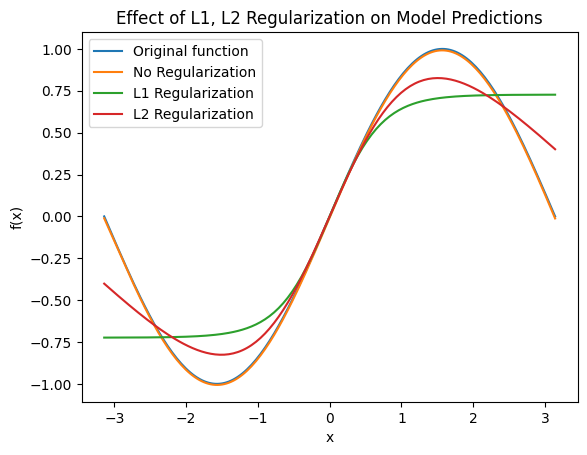

In [43]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y = torch.sin(x)

# Original neural network definition for reference
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Modified neural network definition for activation extraction
class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = torch.sigmoid(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

# Hyperparameters
hidden_size = 50
criterion = nn.MSELoss()

epochs=8000
reg_lambda = 0.01 # regularization weight
learning_rate = 0.01

# Model without regularization
model_no_reg = NetWithActivations(hidden_size=hidden_size)
optimizer_no_reg = torch.optim.Adam(model_no_reg.parameters(), lr=learning_rate)
for epoch in range(epochs):
    y_pred = model_no_reg(x)
    loss = criterion(y_pred, y)
    optimizer_no_reg.zero_grad()
    loss.backward()
    optimizer_no_reg.step()
    if (epoch+1) % 100 == 0:
        print(f'No Reg Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Model with L1 regularization
model_L1 = NetWithActivations(hidden_size=hidden_size)
optimizer_L1 = torch.optim.Adam(model_L1.parameters(), lr=learning_rate)
for epoch in range(epochs):
    y_pred = model_L1(x)
    loss = criterion(y_pred, y)
    # L1 Regularization
    for param in model_L1.parameters():
      loss += reg_lambda * torch.sum(torch.abs(param))
    optimizer_L1.zero_grad()
    loss.backward()
    optimizer_L1.step()
    if (epoch+1) % 100 == 0:
        print(f'L1 Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Model with L2 regularization
model_L2 = NetWithActivations(hidden_size=hidden_size)
optimizer_L2 = torch.optim.Adam(model_L2.parameters(), lr=learning_rate, weight_decay=reg_lambda)
for epoch in range(epochs):
    y_pred = model_L2(x)
    loss = criterion(y_pred, y)
    optimizer_L2.zero_grad()
    loss.backward()
    optimizer_L2.step()
    if (epoch+1) % 100 == 0:
        print(f'L2 Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Visualization
with torch.no_grad():
    predictions_no_reg = model_no_reg(x).detach().numpy()
    predictions_L1 = model_L1(x).detach().numpy()
    predictions_L2 = model_L2(x).detach().numpy()

plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predictions_no_reg, label='No Regularization')
plt.plot(x.numpy(), predictions_L1, label='L1 Regularization')
plt.plot(x.numpy(), predictions_L2, label='L2 Regularization')
plt.legend()
plt.title('Effect of L1, L2 Regularization on Model Predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# 실습 과제 4 (MNIST, SVM Loss)

### 실습 과제 4. Lab 1 ANN for MNIST에서 모델을 hinge loss (SVM loss)로 학습시켜보고 결과를 논의하세요.

### 목표 : loss function에 대해 파악하고 실제 모델에 적용시킬 수 있다.


## 논의사항
- 아래 예제에서는 hinge loss와 softmax loss가 모두 유사한 정확도를 보인다.
- squared hinge loss와 비교하거나 margin을 비교하면서 정확도를 비교해볼 수 있다.
- 실제 정확도를 더 높이기 위해서는 실제로 모델이 틀리는 예제들을 보면서 틀리는 이유에 대해 합당한 설명과 가설을 세워보자.
- 이러한 과정을 통해 새로운 loss 함수에 대한 디자인을 할 수 있고, 새로운 학습 방식에 대한 접근 방법을 생각해볼 수 있다.

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations applied on each image
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Loading the MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Data loaders for the training and test set
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Define the MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)  # First layer (input to hidden)
        self.fc2 = nn.Linear(100, 10)     # Second layer (hidden to output)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # ReLU activation function
        x = self.fc2(x)  # No activation, output raw scores
        return x

# Training with Cross Entropy Loss
print("Training with Cross Entropy Loss:")
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

epochs = 10  # Run for 10 epochs
# Training loop
model.train()
for epoch in range(epochs):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluation loop
model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

accuracy = 100. * correct / len(test_loader.dataset)
print(f'Accuracy: {accuracy}%')

100%|██████████| 9912422/9912422 [00:00<00:00, 104733155.43it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30474388.38it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30983927.16it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3593761.32it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training with Cross Entropy Loss:
Epoch 1, Loss: 0.13964448869228363
Epoch 2, Loss: 0.01889624074101448
Epoch 3, Loss: 0.027686143293976784
Epoch 4, Loss: 0.15848486125469208
Epoch 5, Loss: 0.002802246483042836
Epoch 6, Loss: 0.06046206131577492
Epoch 7, Loss: 0.06007976084947586
Epoch 8, Loss: 0.006610559765249491
Epoch 9, Loss: 0.027925902977585793
Epoch 10, Loss: 0.05526794120669365
Accuracy: 97.87%


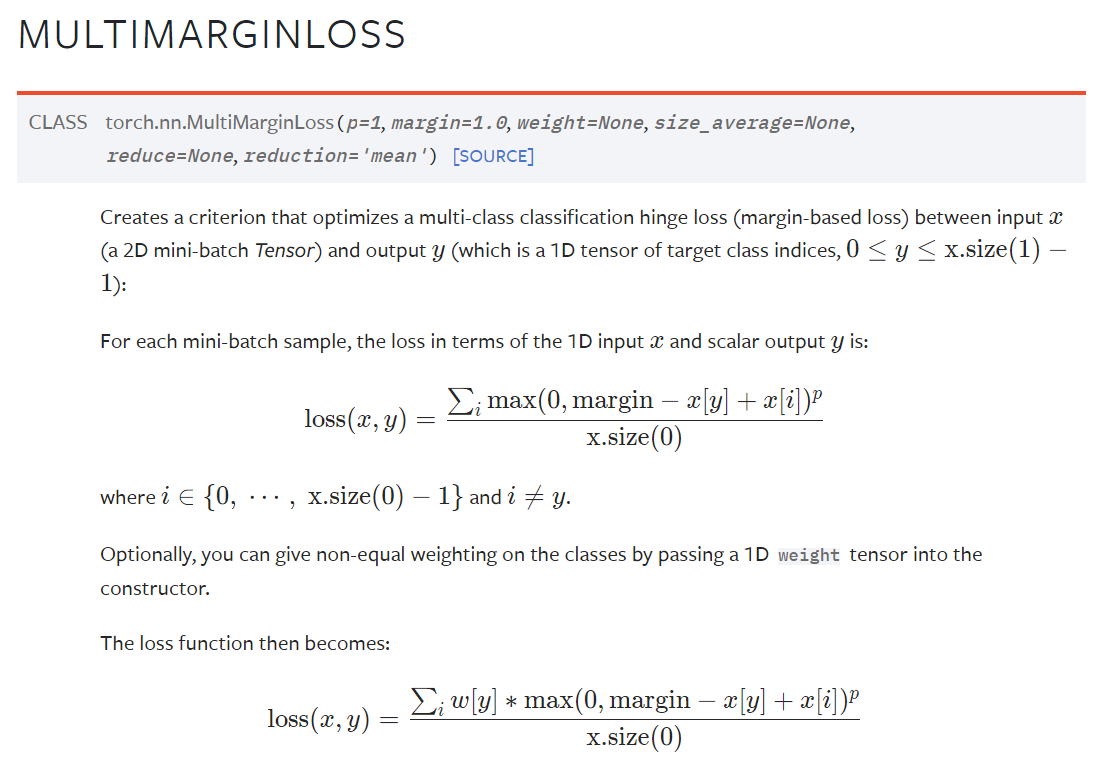

In [45]:
# Training with Cross Entropy Loss
print("Training with Hinge Loss:")
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# loss_fn = nn.CrossEntropyLoss()
loss_fn = nn.MultiMarginLoss(p=1) # Hinge Loss로 변경

epochs = 10  # Run for 10 epochs
# Training loop
model.train()
for epoch in range(epochs):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluation loop
model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

accuracy = 100. * correct / len(test_loader.dataset)
print(f'Accuracy: {accuracy}%')

Training with Cross Entropy Loss:
Epoch 1, Loss: 0.018246687948703766
Epoch 2, Loss: 0.02882343903183937
Epoch 3, Loss: 0.034188274294137955
Epoch 4, Loss: 0.017885487526655197
Epoch 5, Loss: 0.009166867472231388
Epoch 6, Loss: 0.007918957620859146
Epoch 7, Loss: 0.02009012922644615
Epoch 8, Loss: 0.007334681693464518
Epoch 9, Loss: 0.003280369099229574
Epoch 10, Loss: 0.006675216369330883
Accuracy: 97.64%


In [46]:
# Training with Cross Entropy Loss
print("Training with Hinge Loss:")
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# loss_fn = nn.CrossEntropyLoss()
svm_loss = nn.MultiMarginLoss(p=2) # Squared Hinge Loss로 변경

epochs = 10  # Run for 10 epochs
# Training loop
model.train()
for epoch in range(epochs):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluation loop
model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

accuracy = 100. * correct / len(test_loader.dataset)
print(f'Accuracy: {accuracy}%')

Training with Hinge Loss:
Epoch 1, Loss: 0.004488987848162651
Epoch 2, Loss: 0.03782820329070091
Epoch 3, Loss: 0.008073429577052593
Epoch 4, Loss: 0.019663039594888687
Epoch 5, Loss: 0.03627604618668556
Epoch 6, Loss: 0.0
Epoch 7, Loss: 0.0005451652687042952
Epoch 8, Loss: 0.0044176094233989716
Epoch 9, Loss: 0.003665667725726962
Epoch 10, Loss: 0.001100612455047667
Accuracy: 97.54%


# 실습 과제 5 (Barebone Pytorch)
### 실습 과제 5의 목표 : 딥러닝 모델의 구조를 심도있게 파악하고 barebone function을 이용하여 모델을 만들 수 있다.

# 실습 과제 6 (CPU vs GPU)

### 실습 과제 6. 다음 x와 w의 matrix multiplication을 수행하고자 할 때, GPU 사용과 CPU 사용시 수행시간을 비교하세요.
x = torch.rand(512, 4096)
w = torch.rand(4096, 4096)


### 목표 : CPU와 GPU 사용의 차이점을 파악할 수 있다.



## 논의사항
- 어떠한 환경에서 실험을 수행했는 지 (특히, 어떤 GPU를 사용했는 지) 명시했는 지?
- 결과가 어떻게 차이가 나는 지 설명을 하고 있는 지?

# 실습 과제 7 (Weight Visualization)

### 실습 과제 7수업에서 설명한 Logistic Regression (Linear Classifier)과 ANN으로 각각CIFAR10 데이터를 학습시키고 이미지와 곱해지는 weight들을 이미지 형태로 시각화 하여 비교하세요.

### 목표 : 딥러닝 모델을 직접 만들고 weight를 시각화하여 비교 분석할 수 있다.


## 논의사항
- Linear 모델과 ANN 모델을 돌리고 정확도를 비교했는 지? 정확도가 각각 30%, 50%로 나온다.
> 30%는 정확도가 낮지만 최소 정확도인 10%보다는 높은 어느 정도 동작하고 있다고 할 수 있다. ANN은 더 복잡성(complexity)가 높아지면서 더 높은 성능을 보인다.

- weight에 대한 시각화를 하여 비교했는 지
> Linear 모델 weight는 각 class에 해당하는 이미지가 대략적으로 드러나는 템플릿 형태가 학습된다.
>
> ANN에서 학습된 weight는 class 수보다 많은 여러가지 다양한 형태의 template이 학습된다.

## Linear Model

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# CIFAR-10 데이터셋 로드
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 이미지 정규화
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 로지스틱 회귀 모델 정의
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(3*32*32, 10)

    def forward(self, x):
        x = x.view(-1, 3*32*32)
        out = self.linear(x)
        return out

model = LogisticRegression()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 학습
for epoch in range(20):  # 데이터셋을 여러번 반복해서 학습합니다.
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# 모델 평가
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

100%|██████████| 170498071/170498071 [00:04<00:00, 41890905.75it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1 loss: 1.861
Epoch 2 loss: 1.766
Epoch 3 loss: 1.737
Epoch 4 loss: 1.720
Epoch 5 loss: 1.708
Epoch 6 loss: 1.698
Epoch 7 loss: 1.689
Epoch 8 loss: 1.685
Epoch 9 loss: 1.678
Epoch 10 loss: 1.674
Epoch 11 loss: 1.670
Epoch 12 loss: 1.666
Epoch 13 loss: 1.662
Epoch 14 loss: 1.660
Epoch 15 loss: 1.657
Epoch 16 loss: 1.654
Epoch 17 loss: 1.653
Epoch 18 loss: 1.651
Epoch 19 loss: 1.649
Epoch 20 loss: 1.647
Accuracy of the network on the 10000 test images: 40 %


In [56]:
model.linear.weight.shape

torch.Size([10, 3072])

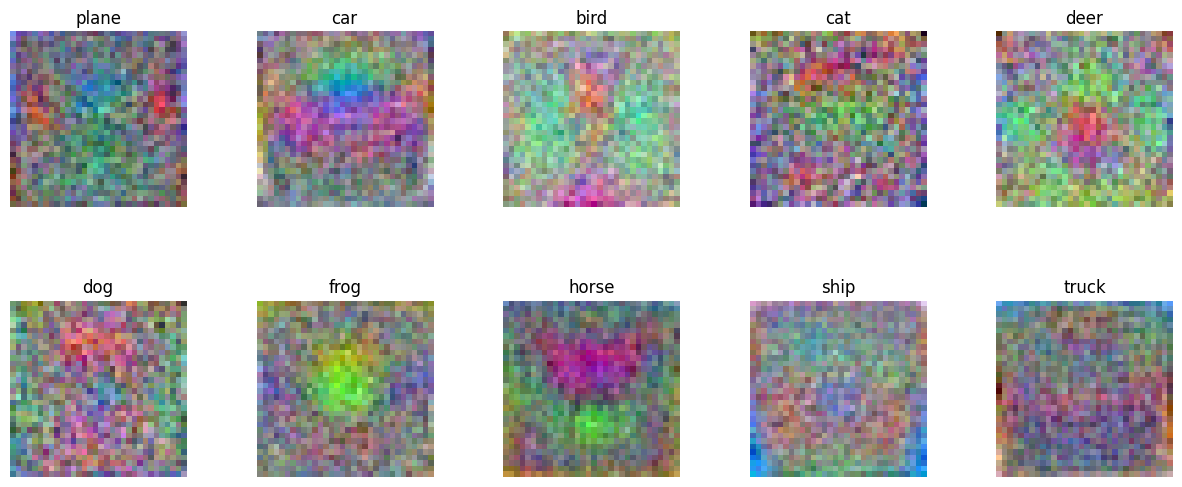

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# 가중치 행렬 가져오기
weights = model.linear.weight.data.numpy()

# 클래스 별로 가중치 시각화
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(2):
    for j in range(5):
        class_weight = weights[i * 5 + j]
        class_weight = class_weight.reshape(3, 32, 32)
        class_weight = class_weight - np.min(class_weight)
        class_weight = class_weight / np.max(class_weight)
        axs[i, j].imshow(np.transpose(class_weight, (1, 2, 0)))
        axs[i, j].set_title(classes[i * 5 + j])
        axs[i, j].axis('off')

plt.show()

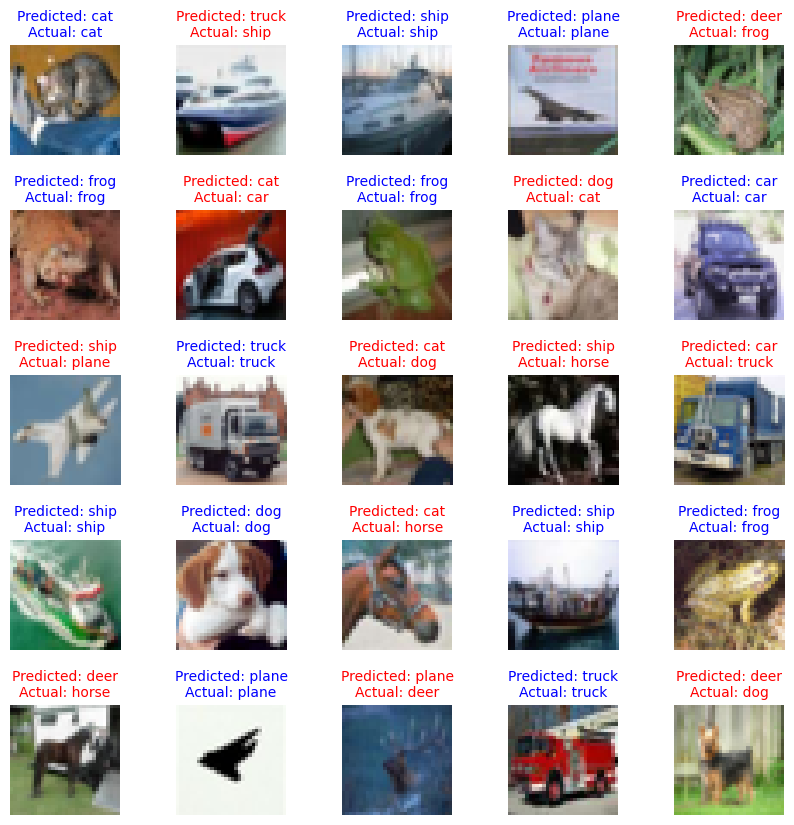

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 데이터셋 클래스의 레이블
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 테스트 데이터셋에서 이미지와 레이블을 무작위로 선택합니다.
images, labels = next(iter(test_loader))

# 모델로부터 예측을 얻어옵니다.
outputs = model(images.view(images.size(0), -1))
_, predicted = torch.max(outputs, 1)

# 이미지, 예측값, 실제값을 시각화합니다.
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    image = images[i] / 2 + 0.5  # 정규화 역변환
    plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # 이미지를 정상적인 형태로 변환하여 표시합니다.
    plt.axis('off')
    title_color = 'blue' if predicted[i] == labels[i] else 'red'
    plt.title(f"Predicted: {classes[predicted[i]]}\nActual: {classes[labels[i]]}", fontsize=10, color=title_color)
plt.show()


## ANN

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# CIFAR-10 데이터셋 로드와 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 다층 퍼셉트론(MLP) 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 120)  # 입력 이미지 차원: 3*32*32, 은닉층1 크기: 120
        self.fc2 = nn.Linear(120, 84)  # 은닉층1 크기: 120, 은닉층2 크기: 84
        self.fc3 = nn.Linear(84, 10)  # 은닉층2 크기: 84, 출력 클래스: 10

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # 이미지를 평탄화
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 초기화
model = MLP()

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 모델 학습
for epoch in range(40):  # 데이터셋을 여러번 반복하여 훈련
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(trainloader)))

print('Finished Training')


# 테스트 데이터로 모델 평가
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

100%|██████████| 170498071/170498071 [00:04<00:00, 39412365.57it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1 loss: 2.137
Epoch 2 loss: 1.883
Epoch 3 loss: 1.757
Epoch 4 loss: 1.680
Epoch 5 loss: 1.626
Epoch 6 loss: 1.580
Epoch 7 loss: 1.541
Epoch 8 loss: 1.507
Epoch 9 loss: 1.475
Epoch 10 loss: 1.447
Epoch 11 loss: 1.420
Epoch 12 loss: 1.395
Epoch 13 loss: 1.370
Epoch 14 loss: 1.347
Epoch 15 loss: 1.326
Epoch 16 loss: 1.305
Epoch 17 loss: 1.285
Epoch 18 loss: 1.267
Epoch 19 loss: 1.247
Epoch 20 loss: 1.228
Finished Training
Accuracy of the network on the 10000 test images: 52 %


In [10]:
# prompt: save the model
torch.save(model.state_dict(), "ANN_model.pt")

In [18]:
# prompt: load model

model = MLP()
model.load_state_dict(torch.load("ANN_model.pt"))


<All keys matched successfully>

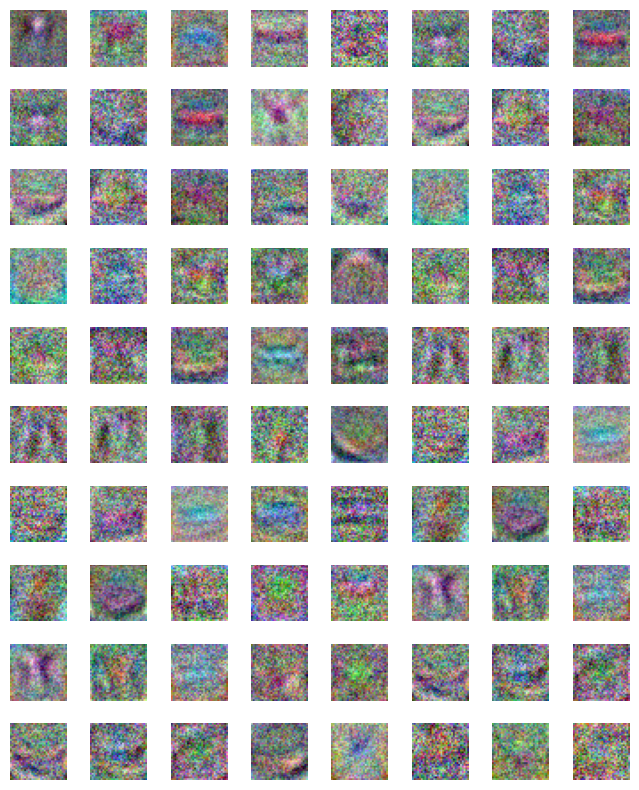

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 가중치 행렬 가져오기
weights = model.fc1.weight.data.numpy()

# 클래스 별로 가중치 시각화
fig, axs = plt.subplots(10, 8, figsize=(8, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(10):
    for j in range(8):
        class_weight = weights[i * 5 + j]
        class_weight = class_weight.reshape(3, 32, 32)
        class_weight = class_weight - np.min(class_weight)
        class_weight = class_weight / np.max(class_weight)
        axs[i, j].imshow(np.transpose(class_weight, (1, 2, 0)))
        axs[i, j].axis('off')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 데이터셋 클래스의 레이블
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 테스트 데이터셋에서 이미지와 레이블을 무작위로 선택합니다.
images, labels = next(iter(testloader))

# 모델로부터 예측을 얻어옵니다.
outputs = model(images.view(images.size(0), -1))
_, predicted = torch.max(outputs, 1)

# 이미지, 예측값, 실제값을 시각화합니다.
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    image = images[i] / 2 + 0.5  # 정규화 역변환
    plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # 이미지를 정상적인 형태로 변환하여 표시합니다.
    plt.axis('off')
    title_color = 'blue' if predicted[i] == labels[i] else 'red'
    plt.title(f"Predicted: {classes[predicted[i]]}\nActual: {classes[labels[i]]}", fontsize=10, color=title_color)
plt.show()


In [22]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# CIFAR-10 데이터셋 로드와 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 다층 퍼셉트론(MLP) 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 120)  # 입력 이미지 차원: 3*32*32, 은닉층1 크기: 120
        self.fc2 = nn.Linear(120, 84)  # 은닉층1 크기: 120, 은닉층2 크기: 84
        self.fc3 = nn.Linear(84, 10)  # 은닉층2 크기: 84, 출력 클래스: 10

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # 이미지를 평탄화
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 초기화
model = MLP()

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 모델 학습
for epoch in range(40):  # 데이터셋을 여러번 반복하여 훈련
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(trainloader)))

print('Finished Training')


# 테스트 데이터로 모델 평가
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Files already downloaded and verified
Files already downloaded and verified
Epoch 1 loss: 2.151
Epoch 2 loss: 1.895
Epoch 3 loss: 1.762
Epoch 4 loss: 1.684
Epoch 5 loss: 1.630
Epoch 6 loss: 1.585
Epoch 7 loss: 1.546
Epoch 8 loss: 1.511
Epoch 9 loss: 1.480
Epoch 10 loss: 1.450
Epoch 11 loss: 1.423
Epoch 12 loss: 1.397
Epoch 13 loss: 1.373
Epoch 14 loss: 1.351
Epoch 15 loss: 1.330
Epoch 16 loss: 1.310
Epoch 17 loss: 1.288
Epoch 18 loss: 1.269
Epoch 19 loss: 1.251
Epoch 20 loss: 1.233
Epoch 21 loss: 1.215
Epoch 22 loss: 1.198
Epoch 23 loss: 1.182
Epoch 24 loss: 1.167
Epoch 25 loss: 1.151
Epoch 26 loss: 1.137
Epoch 27 loss: 1.120
Epoch 28 loss: 1.106
Epoch 29 loss: 1.093
Epoch 30 loss: 1.080
Epoch 31 loss: 1.065
Epoch 32 loss: 1.054
Epoch 33 loss: 1.039
Epoch 34 loss: 1.029
Epoch 35 loss: 1.015
Epoch 36 loss: 1.002
Epoch 37 loss: 0.991
Epoch 38 loss: 0.979
Epoch 39 loss: 0.970
Epoch 40 loss: 0.958
Finished Training
Accuracy of the network on the 10000 test images: 52 %


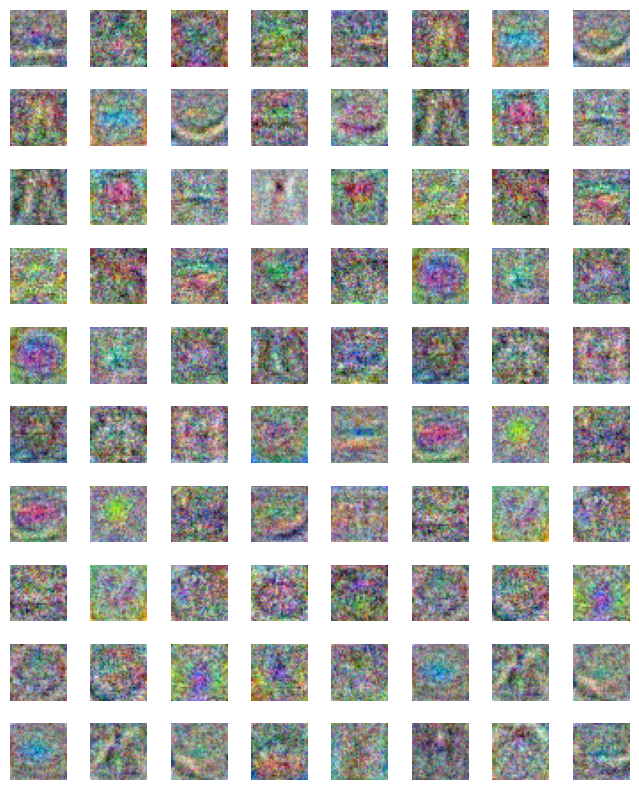

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 가중치 행렬 가져오기
weights = model.fc1.weight.data.numpy()

# 클래스 별로 가중치 시각화
fig, axs = plt.subplots(10, 8, figsize=(8, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(10):
    for j in range(8):
        class_weight = weights[i * 5 + j]
        class_weight = class_weight.reshape(3, 32, 32)
        class_weight = class_weight - np.min(class_weight)
        class_weight = class_weight / np.max(class_weight)
        axs[i, j].imshow(np.transpose(class_weight, (1, 2, 0)))
        axs[i, j].axis('off')

plt.show()